<h1>Итоговый проект по курсу «Python для анализа данных»
</h1>

Дан файл **HR.csv** с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты
Требуется выполнить следующее задание

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import heapq
import seaborn
import statsmodels.api as sm

In [2]:
#Файл с данными
#curl = "https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view"

url = f"https://docs.google.com/spreadsheets/d/1RN7jgqdVCpTG2afjk_uzjEqI_ylyvFEoG-oQMhENCEU/export?format=csv"

<h2>1. Загрузите файл HR.csv в pandas dataframe</h2>

In [4]:
df = pd.read_csv(url)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<h2>2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).</h2>

In [33]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<h2>3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.</h2>

<h2>Вывод</h2>
<ol>
<li>Наивысшая степерь корреляция между *average_montly_hours* c *last_evaluation* и *satisfaction_level* c *left*</li>
<li>Минимальная корреляция между *average_montly_hours* с *promotion_last_5years* и *Work_accident* с *time_spend_company* </li>
</ol>

In [35]:
corr = df.corr()
print(corr)
corr.style.background_gradient(cmap='coolwarm')

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Каждое значение повторяется два раза, но у нас нет уверенности, что случайно не совпали 4, поэтому вместо дистинкта применяем визуальный осмотр 4 значений

In [71]:
flatted_corr = list(map(lambda x: abs(x), filter(lambda x: x != 1, corr.stack().tolist())))
smallest = heapq.nsmallest(4, flatted_corr)
print(smallest)
largest = heapq.nlargest(4, flatted_corr)
print(largest)

[0.0021204180967097077, 0.0021204180967097077, 0.0035444142929947717, 0.0035444142929947717]
[0.41721063440177986, 0.41721063440177986, 0.3883749834241161, 0.3883749834241161]


Минимальная корреляция между *average_montly_hours* с *promotion_last_5years* и *Work_accident* с *time_spend_company* 

In [72]:
smallest_distinct = set(smallest)
{s: corr[abs(corr) == s] for s in smallest_distinct}

{0.0035444142929947717:                        satisfaction_level  last_evaluation  number_project  \
 satisfaction_level                    NaN              NaN             NaN   
 last_evaluation                       NaN              NaN             NaN   
 number_project                        NaN              NaN             NaN   
 average_montly_hours                  NaN              NaN             NaN   
 time_spend_company                    NaN              NaN             NaN   
 Work_accident                         NaN              NaN             NaN   
 left                                  NaN              NaN             NaN   
 promotion_last_5years                 NaN              NaN             NaN   
 
                        average_montly_hours  time_spend_company  \
 satisfaction_level                      NaN                 NaN   
 last_evaluation                         NaN                 NaN   
 number_project                          NaN                

Наивысшая степерь корреляция между *average_montly_hours* c *last_evaluation* и *satisfaction_level* c *left*

In [73]:
largest_distinct = set(largest)
{s: corr[abs(corr) == s] for s in largest_distinct}

{0.41721063440177986:                        satisfaction_level  last_evaluation  number_project  \
 satisfaction_level                    NaN              NaN             NaN   
 last_evaluation                       NaN              NaN             NaN   
 number_project                        NaN              NaN             NaN   
 average_montly_hours                  NaN              NaN        0.417211   
 time_spend_company                    NaN              NaN             NaN   
 Work_accident                         NaN              NaN             NaN   
 left                                  NaN              NaN             NaN   
 promotion_last_5years                 NaN              NaN             NaN   
 
                        average_montly_hours  time_spend_company  \
 satisfaction_level                      NaN                 NaN   
 last_evaluation                         NaN                 NaN   
 number_project                     0.417211                 N

<h2>4. Рассчитайте сколько сотрудников работает в каждом
департаменте.</h2>

In [83]:
df.groupby("department").size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [87]:
#Всего сотрудников
len(df)

14999

<h2>5. Показать распределение сотрудников по зарплатам</h2>

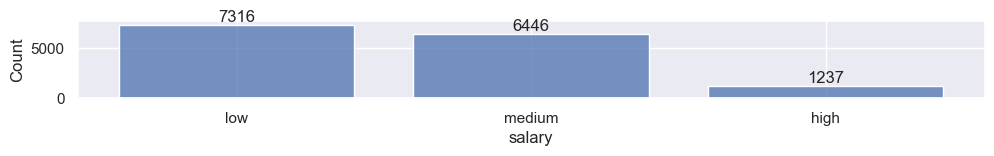

In [105]:
ax = seaborn.histplot(df["salary"], shrink=.8)
for i in ax.containers:
    ax.bar_label(i,)

<h2>6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности</h2>

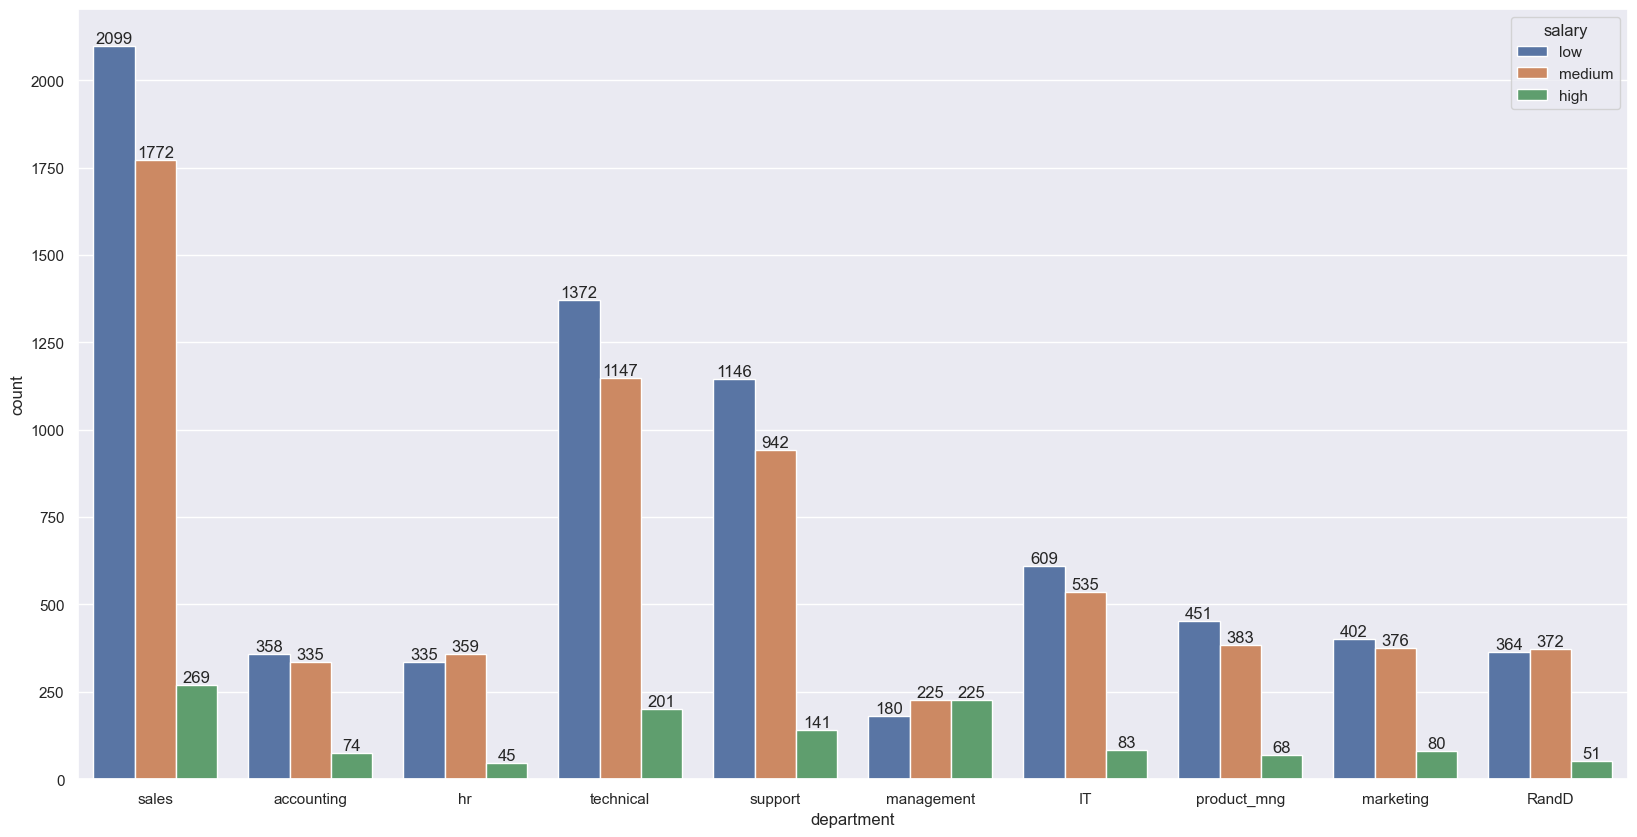

In [116]:
seaborn.set(rc={'figure.figsize':(20,10)})
az = seaborn.countplot(data=df, x="department", hue="salary")
for label in az.containers:
    az.bar_label(label)
plt.show()

<h2>7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом</h2>

**Вывод**
Гипотеза не подтверждается.
<ol>
<li>Среднее для high меньше, чем для low</li>
<li>Распределения схожи, не нормальные. Критерий манна-уитни не позволяет отклонить нулевую гипотезу о равенстве распределений</li>
</ol>

In [125]:
#По сводной таблице уже понятно, работники с высоким заработком проводят на работе не больше, чем сотрудники с низким окладом
pd.pivot_table(df, values=["average_montly_hours"], columns='salary', aggfunc='mean')

salary,high,low,medium
average_montly_hours,199.867421,200.996583,201.338349


In [9]:
dist_low = df[df["salary"] == "low"]["average_montly_hours"]
dist_high = df[df["salary"] == "high"]["average_montly_hours"]

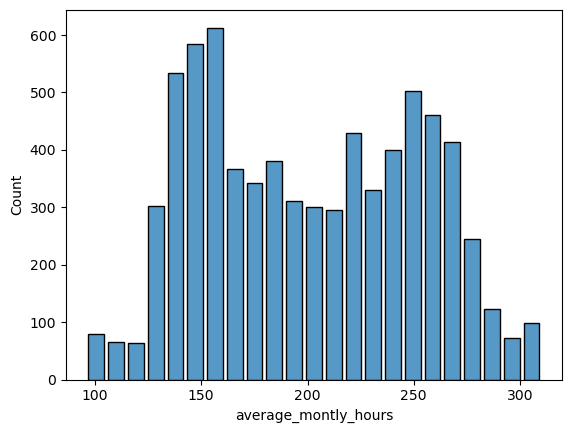

In [11]:
al = seaborn.histplot(dist_low, shrink=.8)

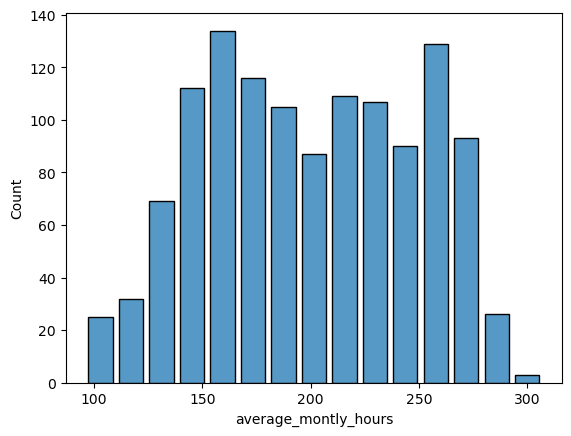

In [12]:
al = seaborn.histplot(dist_high, shrink=.8)

In [16]:
stat, p = st.mannwhitneyu(dist_low, dist_high)
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


<h2>8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
</h2>

<h3>Уволившиеся сотрудники</h3>

In [24]:
df_left = df[df["left"] == 1]
df_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<h4>Доля сотрудников с повышением за последние 5 лет</h4>

In [31]:
print(len(df_left[df_left["promotion_last_5years"]== 1]) / len(df_left) * 100, "%")
print("Пол процента, Карл!")

0.5320638476617194 %
Пол процента, Карл!


<h4>Средняя степень удовлетворенности</h4>

In [34]:
df_left["satisfaction_level"].mean()

0.44009801176140917

<h4>Среднее количество проектов</h4>

In [36]:
df_left["number_project"].mean()

3.8555026603192384

<h3>Не уволившиеся сотрудники</h3>

In [38]:
df_non_left = df[df["left"] == 0]
df_non_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


<h4>Доля сотрудников с повышением за последние 5 лет</h4>

In [39]:
print(len(df_non_left[df_non_left["promotion_last_5years"]== 1]) / len(df_non_left) * 100, "%")

2.6251312565628284 %


<h4>Средняя степень удовлетворенности</h4>

In [42]:
df_non_left["satisfaction_level"].mean()

0.666809590479516

<h4>Среднее количество проектов</h4>

In [41]:
df_non_left["number_project"].mean()

3.786664333216661

<h3>Ну или не по отдельности</h3>

In [56]:
df_summary = df.groupby("left").agg({'promotion_last_5years': lambda x: x[x == 1].count() / x.count(), 
                         'satisfaction_level':'mean', 
                         'number_project':'mean'}).reset_index()
df_summary["left"] = np.where(df_summary["left"] == 1, "Уволились", "Остались")
df_summary

,left,promotion_last_5years,satisfaction_level,number_project
0,Остались,0.026251,0.666810,3.786664
1,Уволились,0.005321,0.440098,3.855503


<h2>9. Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки</h2>

**Вывод:**

Построенная модель lda показала 75.6% точность.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

<h3>Подготовка тестовой и обучающих выборок</h3>

In [60]:
df_base = df.drop(['left', 'department', 'salary'], axis=1)
df_base

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [62]:
df_target = df["left"]
df_target

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df_base, df_target, test_size=0.30, random_state=42)

<h3>Построение LDA модели</h3>

In [86]:
clf = LDA()

In [95]:
results = clf.fit(X_train, y_train)

In [109]:
possitive = (clf.predict(X_test) == np.array(y_test)).sum()
possitive

3401

<h3>Оценка качества модели на тестовой выборке</h3>

In [110]:
possitive/len(X_test)

0.7557777777777778